<a href="https://colab.research.google.com/github/i-am-batman-28/Data-Sci/blob/main/Tesla_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')

In [4]:
df.head()

Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [6]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
mean    138.691296   141.771603   135.425953   138.762183   138.762183   
std     250.044839   255.863239   243.774157   250.123115   250.123115   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%      19.627000    20.402000    19.127500    19.615000    19.615000   
50%      46.656999    47.487001    45.820002    46.545000    46.545000   
75%      68.057001    69.357500    66.911501    68.103998    68.103998   
max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   

             Volume  
count  2.956000e+03  
mean   3.131449e+07  
std    2.798383e+07  
min    5.925000e+05  
25%    1.310288e+07  
50%    2.488680e+07  
75%    3.973875e+07  
max    3.046940e+08

In [12]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

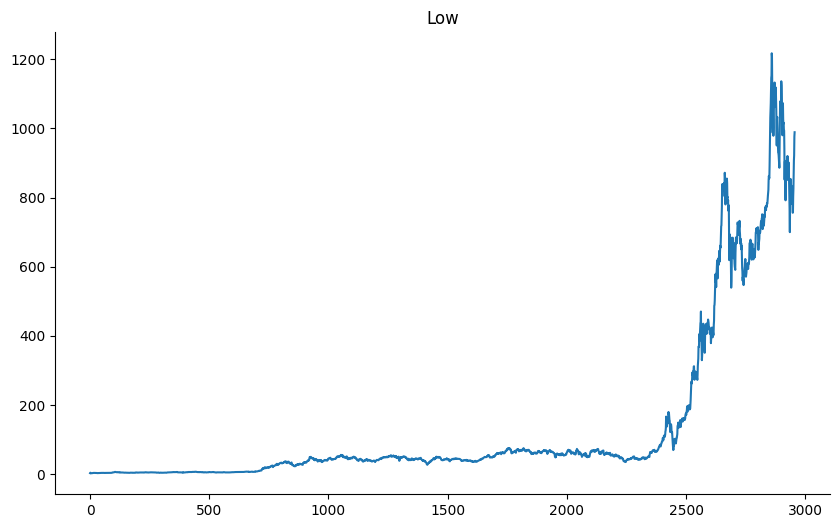

In [17]:
plt.figure(figsize = (10,6))
df['Low'].plot(kind = 'line', figsize= (10,6), title = 'Low')
plt.gca().spines[['top', 'right']].set_visible(False)


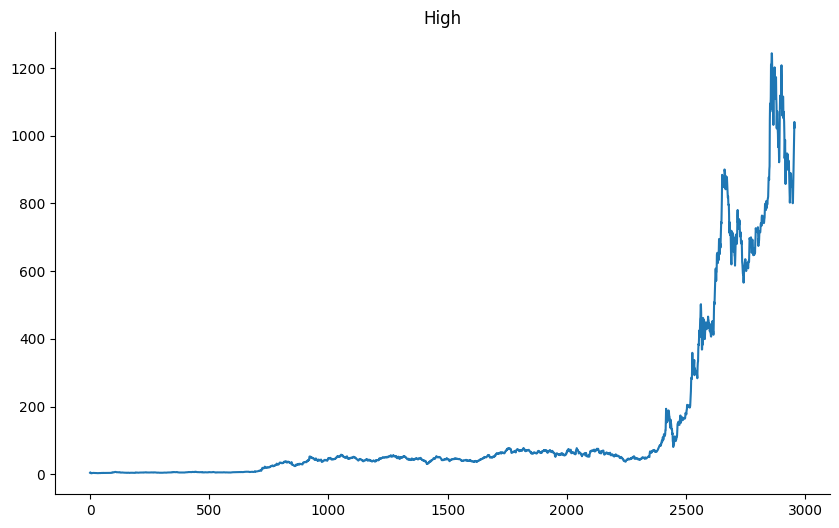

In [18]:
plt.figure(figsize = (10,6))
df['High'].plot(kind = 'line', figsize= (10,6), title = 'High')
plt.gca().spines[['top', 'right']].set_visible(False)

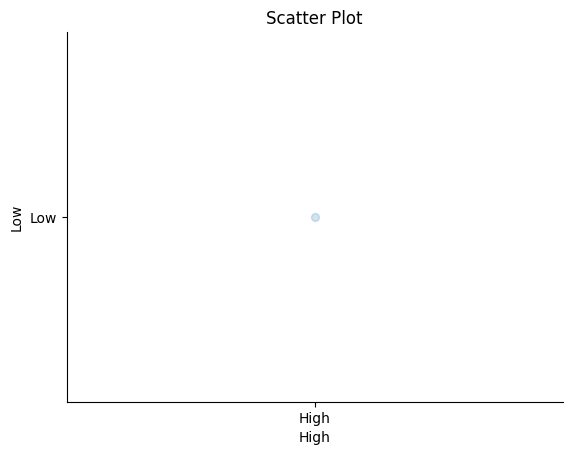

In [30]:
plt.scatter(x = 'High', y = 'Low' , s=32, alpha= 0.2)
plt.title('Scatter Plot')
plt.xlabel('High')
plt.ylabel('Low')
plt.gca().spines[['top', 'right']].set_visible(False)

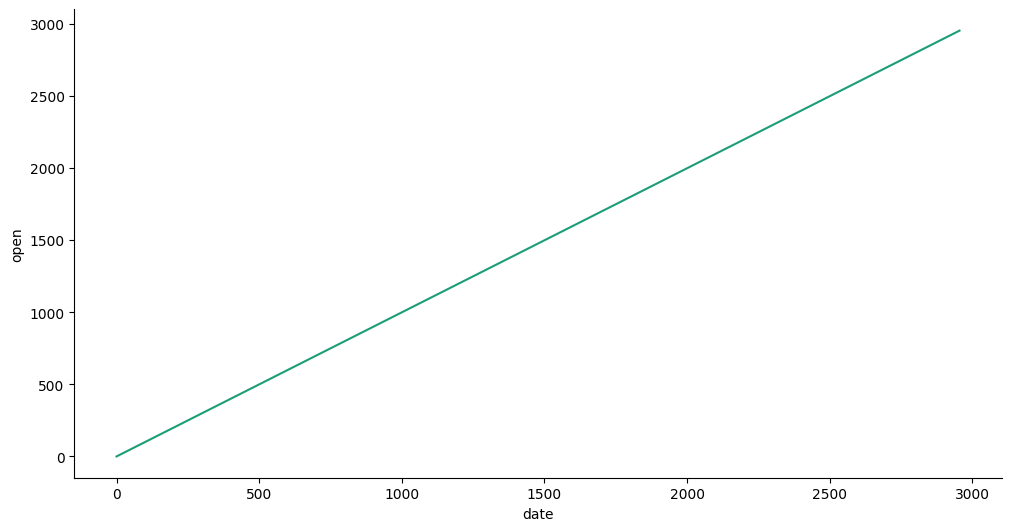

In [21]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Date']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('open')

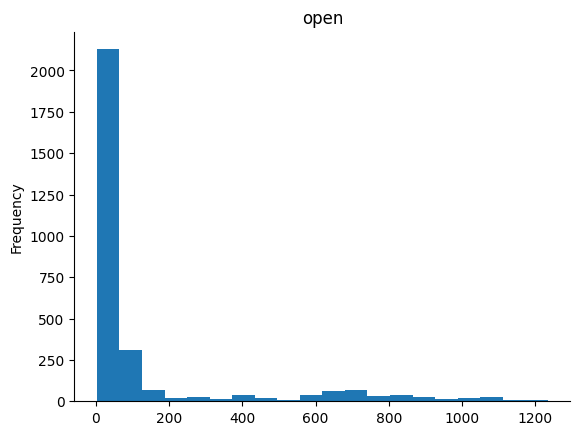

In [24]:
df['Open'].plot(kind = 'hist', bins = 20, title = 'open')
plt.gca().spines[['top', 'right']].set_visible(False)


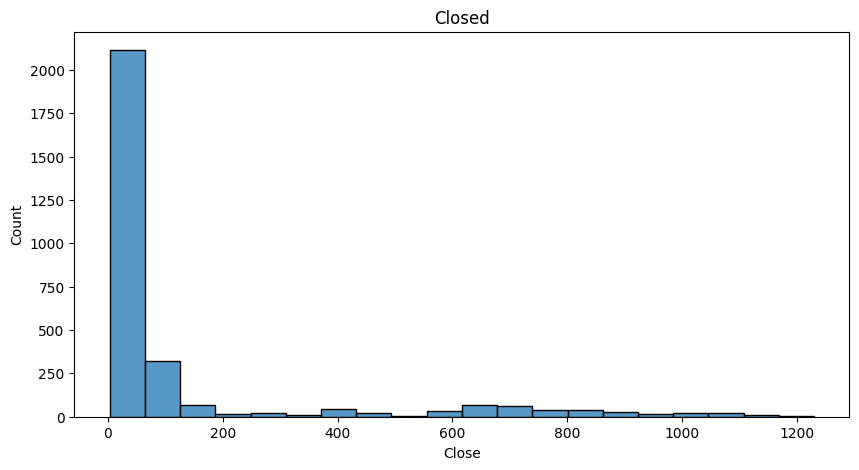

In [25]:
plt.figure(figsize=(10,5))
plt.title('Closed')
sns.histplot(data=df,x='Close',bins=20)
plt.show()

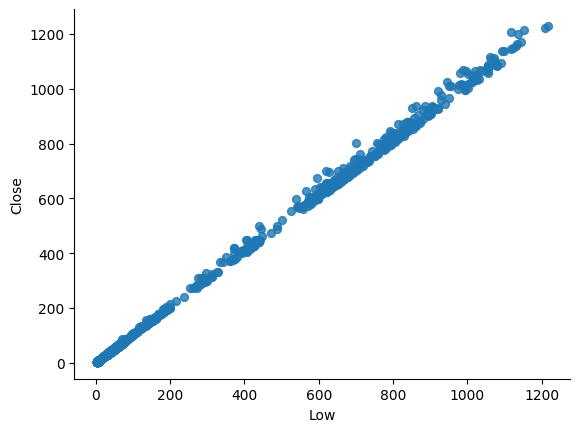

In [28]:
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
df.iloc[:,1:5].corr()

Open      High       Low     Close
Open   1.000000  0.999726  0.999617  0.999247
High   0.999726  1.000000  0.999595  0.999666
Low    0.999617  0.999595  1.000000  0.999670
Close  0.999247  0.999666  0.999670  1.000000

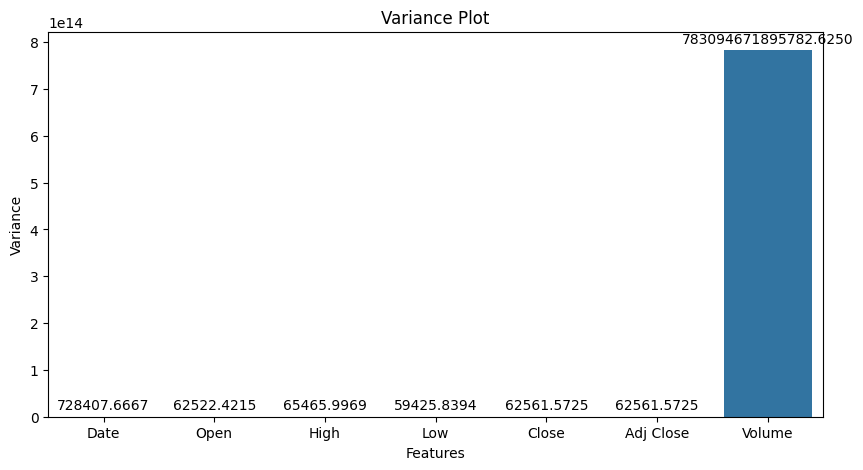

In [35]:
plt.figure(figsize=(10,5))
plt.title('Variance Plot')
plot = sns.barplot(data=df.var())
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

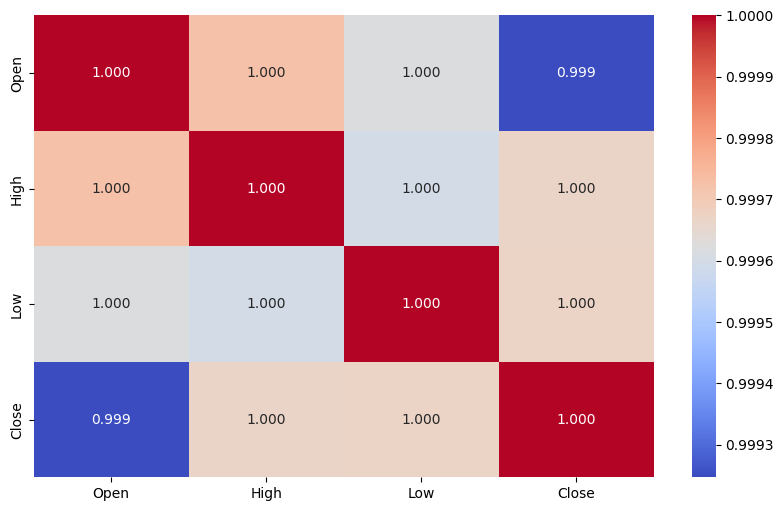

In [37]:
plt.figure(figsize = (10,6))
sns.heatmap(data=df.iloc[:,1:5].corr(),cmap='coolwarm',fmt='.3f',annot=True)
plt.show()

Text(0.5, 1.0, 'Boxplot')

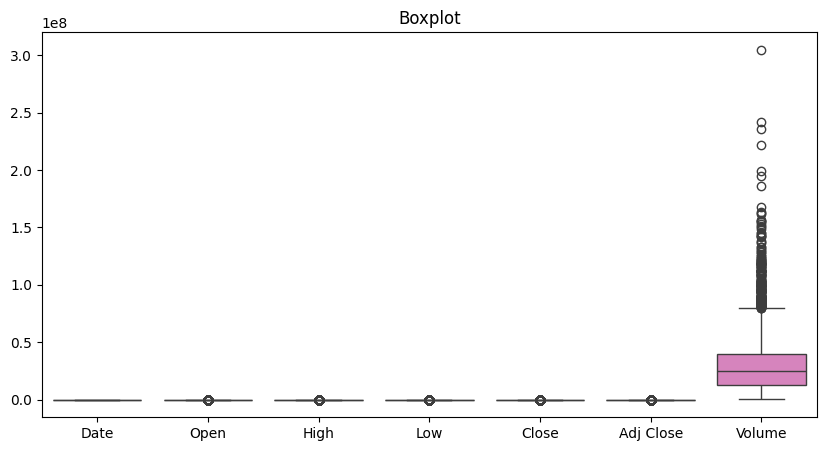

In [38]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df)
plt.title('Boxplot')

In [8]:
cat = df.columns[df.dtypes == 'object']
num = df.columns[df.dtypes != 'object']

In [42]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]